In [11]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import Signal as sig
import pulsar as puls
import ism as ism

In [12]:
Sig1 = sig.Signal()
P1 = puls.Pulsar(Sig1) #Intialize signal and pulsar

In [13]:
P1.pulses()
PreDispSig = np.array(P1.signal) #Need to save signal as array to archive

In [14]:
ism1 = ism.ISM(Sig1) #ISM module takes signal as input

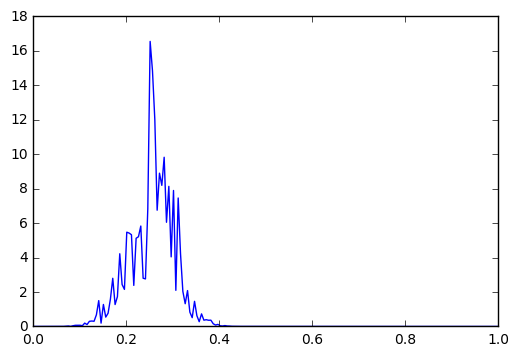

In [15]:
plt.plot(P1.phase,Sig1.signal[1,:])
plt.show()

In [16]:
ism1.signal[1,:] = ism1.shiftit(ism1.signal[1,:],-12) #Shift Theorem Function

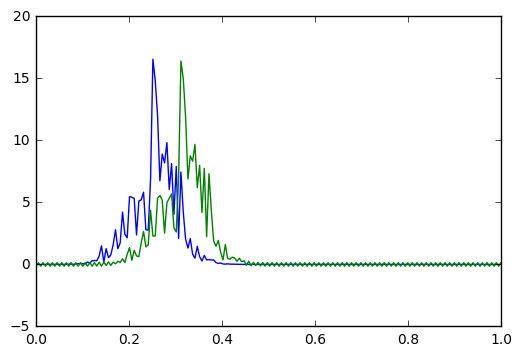

In [17]:
plt.plot(P1.phase,PreDispSig[1,:],P1.phase,ism1.signal[1,:])
plt.show()
ism1.signal[1,:] = ism1.shiftit(ism1.signal[1,:],12)

In [18]:
ism1.disperse(-800) #disperse(DM) Disperses frequency bins accordingly

In [19]:
print("Freq Bin Size=",ism1.freqBinSize) #Also calculated in the process
print("dispersion?", Sig1.MetaData.dispersion)
ism1.freq_Array

Freq Bin Size= 5.0
dispersion? True


array([ 350.,  355.,  360.,  365.,  370.,  375.,  380.,  385.,  390.,
        395.,  400.,  405.,  410.,  415.,  420.,  425.,  430.,  435.,
        440.,  445.])

In [20]:
ism1.time_delays

array([-27.09797612, -26.34002836, -25.61344193, -24.91651022,
       -24.24764116, -23.60534809, -22.98824151, -22.39502159,
       -21.82447123, -21.27544993, -20.74688797, -20.23778128,
       -19.74718664, -19.2742173 , -18.81803897, -18.37786616,
       -17.95295876, -17.54261897, -17.1461884 , -16.76304545])

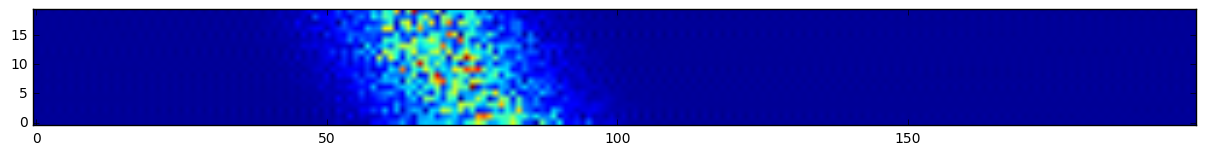

In [21]:
plt.figure(figsize=(15,10))
#plt.xlim(0,100)
plt.imshow(ism1.signal, origin='lower')
plt.show() #Dispersed Signal

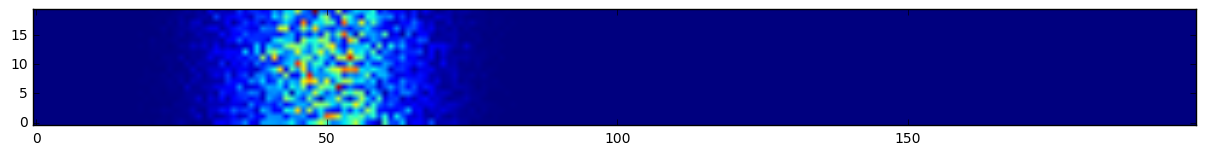

In [22]:
plt.figure(figsize=(15,10))
#plt.xlim(0,100)
plt.imshow(PreDispSig, origin='lower')
plt.show() # Original Signal

In [23]:
Root = sig.Signal()
for ii in range(0,40):
    P = puls.Pulsar(sig.Signal())
    P.pulses()
    Root.signal += P.signal

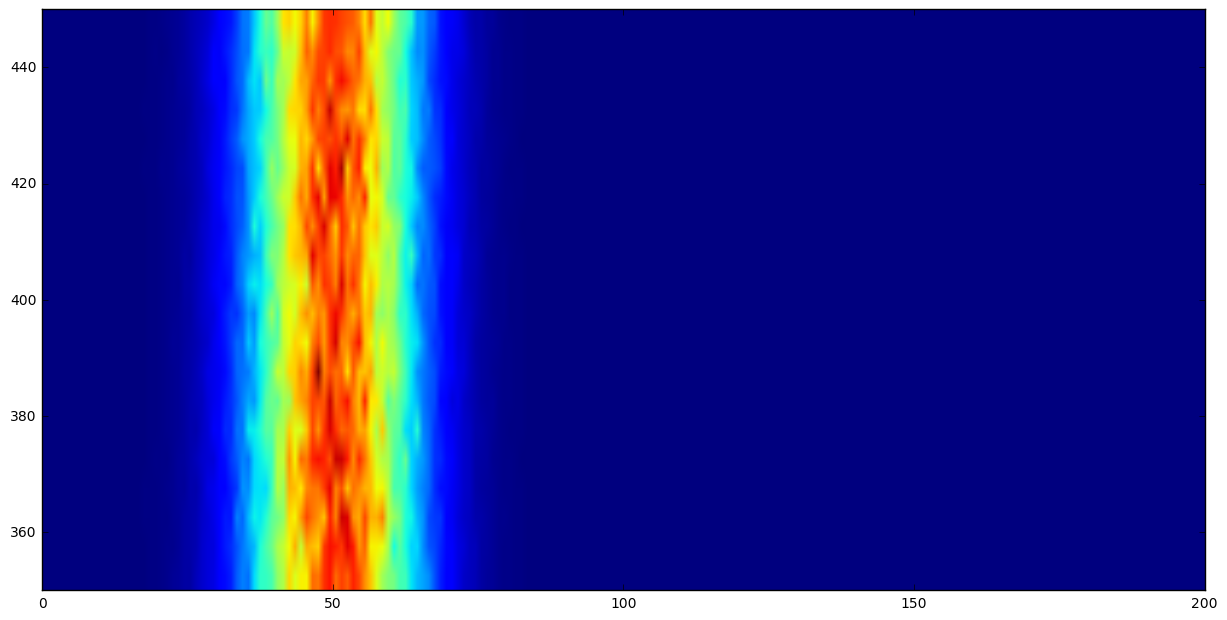

In [24]:
plt.figure(figsize=(15,10))
#plt.xlim(0,100)
plt.imshow(Root.signal, origin='lower', extent=[0,Root.Nt,ism1.first_freq,ism1.last_freq])
plt.show()

In [25]:
ism2 = ism.ISM(Root)
ism2.disperse(-800)

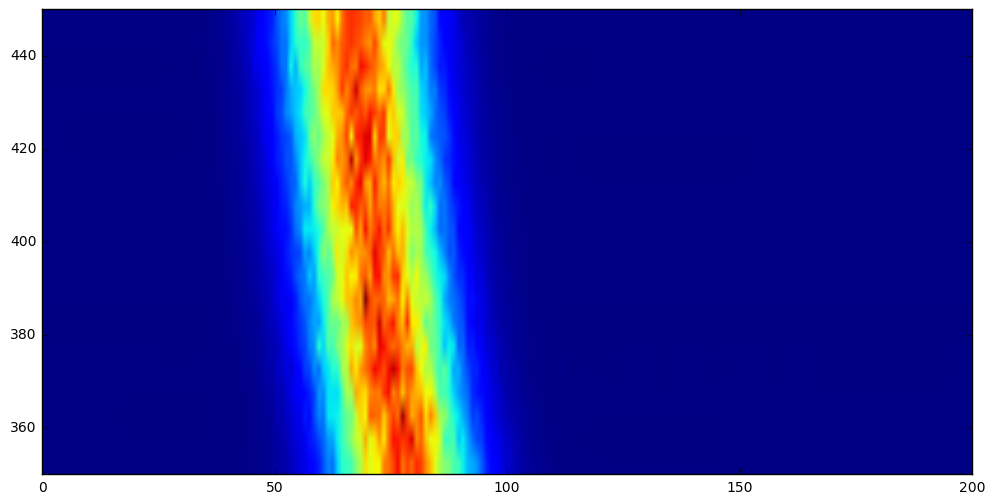

In [26]:
plt.figure(figsize=(15,6))
#plt.xlim(0,100)
plt.imshow(ism2.signal, origin='lower',extent=[0,ism2.Nt,ism2.first_freq,ism2.last_freq])
plt.show()

In [27]:
ism2.disperse(800)

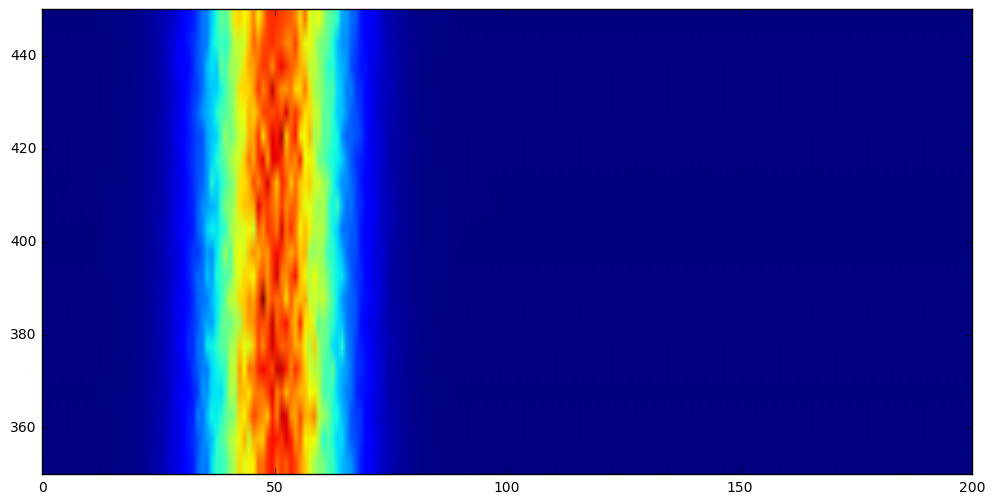

In [28]:
plt.figure(figsize=(15,6))
#plt.xlim(0,100)
plt.imshow(ism2.signal, origin='lower',extent=[0,Root.Nt,ism2.first_freq,ism2.last_freq])
plt.show()

In [29]:
Root.MetaData.DM

800